In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Dollar bars made of 15m time-based bars
df=pd.read_parquet('21.02_btcusdt_dollar_bar')

In [4]:
df

,open,high,low,close,maker fee
timestamp,,,,,
2021-02-14 00:35:00,47673.0,47764.5,47517.5,47673.0,-0.00025
2021-02-14 00:50:00,47673.0,47720.5,47603.0,47649.0,-0.00025
2021-02-14 01:05:00,47649.0,47758.5,47536.0,47544.0,-0.00025
2021-02-14 01:20:00,47544.0,47653.5,47536.0,47556.5,-0.00025
2021-02-14 01:35:00,47556.5,47653.5,47504.5,47511.5,-0.00025
...,...,...,...,...,...
2022-06-09 00:50:00,30135.5,30377.0,30041.5,30231.0,0.00010
2022-06-09 01:05:00,30231.0,30320.0,30211.5,30258.5,0.00010
2022-06-09 01:35:00,30275.0,30300.0,30232.5,30241.5,0.00010


In [95]:
def getTEvents(gRaw, h):
    """cusum filter
    args
    ----
        gRaw: array-like
        h: int() or float()
    returns
    -------
        pd.DatetimeIndex()
    """
    tEvents, sPos, sNeg = [], 0, 0
    diff = np.log(gRaw).diff().dropna().abs()
    for i in diff.index[1:]:
        try:
            pos, neg = float(sPos+diff.loc[i]), float(sNeg+diff.loc[i])
        except Exception as e:
            print(e)
            print(sPos+diff.loc[i], type(sPos+diff.loc[i]))
            print(sNeg+diff.loc[i], type(sNeg+diff.loc[i]))
            break

        sPos, sNeg=max(0., pos), min(0., neg)
        if sNeg<-h:
            sNeg=0;tEvents.append(i)
        elif sPos>h:
            sPos=0;tEvents.append(i)
    return pd.DatetimeIndex(tEvents)


In [212]:
event_index=getTEvents(df['close'].drop_duplicates(),0.1)

<Figure size 432x288 with 0 Axes>

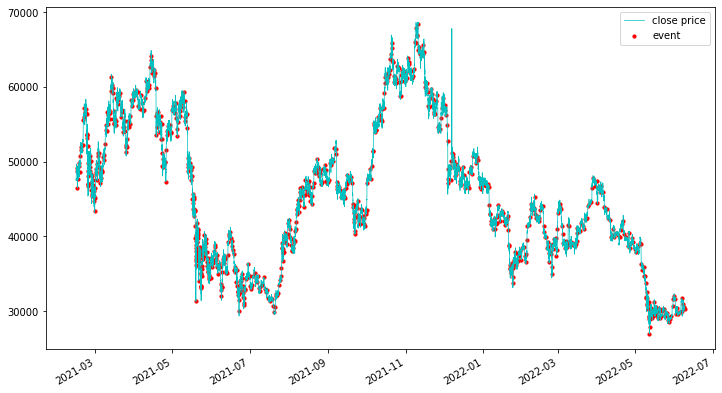

In [215]:
 plt.gcf().autofmt_xdate() 
 
 # example 
 fig,ax=plt.subplots(figsize=(12,7))
 ax.plot(df['close'],label='close price',color='c',linewidth=0.7)
 ax.scatter(x=event_index,y=df.loc[event_index,'close'].drop_duplicates(),color='r',s=10,label='event')
 plt.gcf().autofmt_xdate() 
 ax.legend(bbox_to_anchor=(1,1))

In [216]:
len(event_index)

955